# UNIVERSIDAD POLITECNICA SALESIANA CUENCA
   
   ### SIMULACION 
   
   ##### ESTUDIANTE: DAVID ISRAEL LEON GALLARDO
   
   ### TITULO ####
   
  ### Diseñe y desarrolle un modelo y/o script que permita simular el siguiente caso real:
~~~ 
En base a los datos del siguiente link https://educacion.gob.ec/wp-content/uploads/downloads/2012/08/AZUAY11.pdf, genere una simulación del ingresos de los estudiantes, para ello debemos escoger un establecimiento y en base a los docentes y estudiantes modelar el reingreso de los estudiantes en base a los siguientes datos.
◦	Solo se va a tener en cuenta uno de los planteles educativos(Escuela, colegio, universidad dentro del Azuay).
◦	Se tiene un promedio que el 90% de los docentes han sido vacunados y pueden realizar el proceso de ingreso en cada uno de los cursos.
◦	Dentro del procesos se tiene que alrededor del 5% - 10% de los estudiantes no podrán asistir debido a no presentar la vacuna/enfermedades adyacentes.
◦	Los estudiantes solo pertenecen a una sola entidad educativa al igual que los docentes.
◦	Se va  a tener un periodo de prueba de un mes, posterior a ello se realiza al azar al 10% de estudiantes una prueba PCR para validar que no estén contagiados.
◦	De la ultima el 2% de los estudiantes dan positivo por lo que se cierra el curso completo.
◦	Los estudiantes asisten cada semana y estos están en un horario de 6 horas ya sea diurno o nocturno.
◦	Tienen un receso 30 minutos dentro del establecimiento en donde se concentran todos los estudiantes y exite un foco de contagio del 2%.
•	El proceso de simulación desarrollado deberá considerar los siguientes aspectos:
◦	Generar un cuaderno de Python para el desarrollo y parametrización de graficas, reportes, y animación (Simpy).
◦	Generar una animación en 2D/3D del modelo propuesto.
◦	Obtener los siguientes análisis:
•	Cuantos contagiados tengo al final del mes.
•	Cuantos cursos debo cerrar.
•	Cuantos estudiantes y docentes ingresan y salen al final del mes. 
~~~


###  Se escogio de la Universidad Politecnica Salesiana
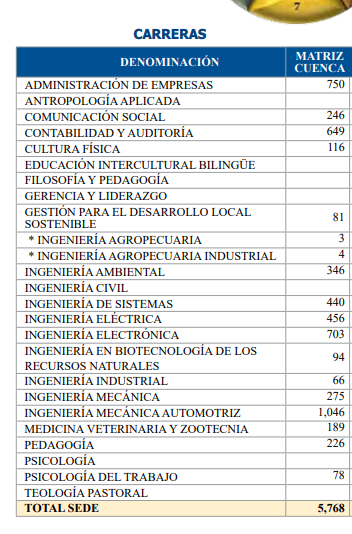

#### Numero de Estudiantes ####
##### 5768

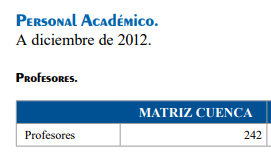

#### Administrativo
##### 242

In [2]:
import random
import simpy
import random
import collections
import matplotlib.pyplot as pp

In [3]:
PROFESORES = 242
P_PROF_VACUNADOS = int(PROFESORES*0.9)
VACUNADOS_PROF = PROFESORES - P_PROF_VACUNADOS
print("Profesores: ",PROFESORES)
print("Profesores vacunados: ",P_PROF_VACUNADOS)
print("Profesores no vacunados:",VACUNADOS_PROF)
ESTUDIANTES = 5768
print("Estudiantes: ",ESTUDIANTES)
P_ESTUDIANTES_NO = random.randint(5,10)
print("% de estudiantes que no asisten: ",P_ESTUDIANTES_NO,"%")
ESTUDIANTES_NO_ASISTEN = int(ESTUDIANTES * P_ESTUDIANTES_NO /100)
print("N° Estudiantes que no asisten: ",ESTUDIANTES_NO_ASISTEN)
ESTUDIANTES_ASISTEN = ESTUDIANTES-ESTUDIANTES_NO_ASISTEN
print("Estudiantes que asisten: ",ESTUDIANTES_ASISTEN)

#Total de estudiantes y profesores vacunados que asisten
TOTAL = P_PROF_VACUNADOS + ESTUDIANTES_ASISTEN

TOTAL_CONTAGIADOS = 0

print("total: ",TOTAL)

cursos = ['curso 1','curso 2','curso 3','curso 4','curso 5','curso 6']
aula1 = {}
aula2 = {}
aula3 = {}
aula4 = {}
aula5 = {}
aula6 = {}

print("Cursos: ",cursos)

#Para el numero de contagiados al final del 
contagiados = []

Profesores:  242
Profesores vacunados:  217
Profesores no vacunados: 25
Estudiantes:  5768
% de estudiantes que no asisten:  9 %
N° Estudiantes que no asisten:  519
Estudiantes que asisten:  5249
total:  5466
Cursos:  ['curso 1', 'curso 2', 'curso 3', 'curso 4', 'curso 5', 'curso 6']


In [5]:
Curso = collections.namedtuple('Curso','contador,cursos,capacidad,usado,t_curso_lleno,puesto_usado,estudiantes,n_estudiantes')

env = simpy.Environment()

contador = simpy.Resource(env, capacity=6)
cursos = ["Curso 1","Curso 2","Curso 3","Curso 4","Curso 5","Curso 6"]
capacidad = {curso: int(((ESTUDIANTES_ASISTEN)/len(cursos))+3) for curso in cursos}
usado = {curso:env.event() for curso in cursos}
#Tiempo en el que el curso se llena
t_curso_lleno = {curso: None for curso in cursos}

#Numero de puestos usados
puesto_usado = {curso: 0 for curso in cursos}

estudiantes =[0] * ESTUDIANTES_ASISTEN
for j in range(ESTUDIANTES_ASISTEN):
    estudiantes[j] = "Estudiante "+str(j)

n_estudiantes = ESTUDIANTES_ASISTEN
    
print("cursos: ",cursos[1])

curs = Curso(contador, cursos, capacidad, usado,t_curso_lleno,puesto_usado,estudiantes,n_estudiantes)
env.process(clases(env,curs))
env.run(until=35)

cursos:  Curso 2
Clases
time  0.00010335253111703179
El estudiante pertenece al curso.  Curso 6
Hora:  0.00010335253111703179
estudiante.  Estudiante 0
Curso 6
Hora 0.00010335253111703179
time  0.01638954441314514
El estudiante pertenece al curso.  Curso 5
Hora:  0.01638954441314514
estudiante.  Estudiante 1
Curso 5
Hora 0.01638954441314514
time  0.029098071714933605
El estudiante pertenece al curso.  Curso 6
Hora:  0.029098071714933605
estudiante.  Estudiante 2
Curso 6
Hora 0.029098071714933605
time  0.044832427675586387
El estudiante pertenece al curso.  Curso 3
Hora:  0.044832427675586387
estudiante.  Estudiante 3
Curso 3
Hora 0.044832427675586387
time  0.06036781764700351
El estudiante pertenece al curso.  Curso 6
Hora:  0.06036781764700351
estudiante.  Estudiante 4
Curso 6
Hora 0.06036781764700351
time  0.07229849454655186
El estudiante pertenece al curso.  Curso 3
Hora:  0.07229849454655186
estudiante.  Estudiante 5
Curso 3
Hora 0.07229849454655186
time  0.08327357034297893
El es

Curso 3
Hora 1.942015494614955
time  1.954975721936185
El estudiante pertenece al curso.  Curso 2
Hora:  1.954975721936185
estudiante.  Estudiante 128
Curso 2
Hora 1.954975721936185
time  1.9668530392312111
El estudiante pertenece al curso.  Curso 2
Hora:  1.9668530392312111
estudiante.  Estudiante 129
Curso 2
Hora 1.9668530392312111
time  1.9855837020051905
El estudiante pertenece al curso.  Curso 1
Hora:  1.9855837020051905
estudiante.  Estudiante 130
Curso 1
Hora 1.9855837020051905
time  1.9969213101522811
El estudiante pertenece al curso.  Curso 4
Hora:  1.9969213101522811
estudiante.  Estudiante 131
Curso 4
Hora 1.9969213101522811
time  2.0114472636339276
El estudiante pertenece al curso.  Curso 6
Hora:  2.0114472636339276
estudiante.  Estudiante 132
Curso 6
Hora 2.0114472636339276
time  2.025980877494505
El estudiante pertenece al curso.  Curso 5
Hora:  2.025980877494505
estudiante.  Estudiante 133
Curso 5
Hora 2.025980877494505
time  2.047048756463379
El estudiante pertenece al 

estudiante.  Estudiante 243
Curso 4
Hora 3.7264895016577633
time  3.7375543451082542
El estudiante pertenece al curso.  Curso 3
Hora:  3.7375543451082542
estudiante.  Estudiante 244
Curso 3
Hora 3.7375543451082542
time  3.747642989267737
El estudiante pertenece al curso.  Curso 6
Hora:  3.747642989267737
estudiante.  Estudiante 245
Curso 6
Hora 3.747642989267737
time  3.759428086601967
El estudiante pertenece al curso.  Curso 4
Hora:  3.759428086601967
estudiante.  Estudiante 246
Curso 4
Hora 3.759428086601967
time  3.7698697563898
El estudiante pertenece al curso.  Curso 4
Hora:  3.7698697563898
estudiante.  Estudiante 247
Curso 4
Hora 3.7698697563898
time  3.7805410534973287
El estudiante pertenece al curso.  Curso 3
Hora:  3.7805410534973287
estudiante.  Estudiante 248
Curso 3
Hora 3.7805410534973287
time  3.8012017497580253
El estudiante pertenece al curso.  Curso 5
Hora:  3.8012017497580253
estudiante.  Estudiante 249
Curso 5
Hora 3.8012017497580253
time  3.811995408549141
El estu

estudiante.  Estudiante 349
Curso 6
Hora 5.262550795605952
time  5.278801132304405
El estudiante pertenece al curso.  Curso 1
Hora:  5.278801132304405
estudiante.  Estudiante 350
Curso 1
Hora 5.278801132304405
time  5.305042282903803
El estudiante pertenece al curso.  Curso 3
Hora:  5.305042282903803
estudiante.  Estudiante 351
Curso 3
Hora 5.305042282903803
time  5.324554848119205
El estudiante pertenece al curso.  Curso 6
Hora:  5.324554848119205
estudiante.  Estudiante 352
Curso 6
Hora 5.324554848119205
time  5.334775439111864
El estudiante pertenece al curso.  Curso 5
Hora:  5.334775439111864
estudiante.  Estudiante 353
Curso 5
Hora 5.334775439111864
time  5.351358606092388
El estudiante pertenece al curso.  Curso 5
Hora:  5.351358606092388
estudiante.  Estudiante 354
Curso 5
Hora 5.351358606092388
time  5.3660603681139385
El estudiante pertenece al curso.  Curso 5
Hora:  5.3660603681139385
estudiante.  Estudiante 355
Curso 5
Hora 5.3660603681139385
time  5.376356329662902
El estud

El estudiante pertenece al curso.  Curso 1
Hora:  7.460431655065296
estudiante.  Estudiante 494
Curso 1
Hora 7.460431655065296
time  7.471999559306119
El estudiante pertenece al curso.  Curso 6
Hora:  7.471999559306119
estudiante.  Estudiante 495
Curso 6
Hora 7.471999559306119
time  7.4846447252801065
El estudiante pertenece al curso.  Curso 5
Hora:  7.4846447252801065
estudiante.  Estudiante 496
Curso 5
Hora 7.4846447252801065
time  7.495289007577645
El estudiante pertenece al curso.  Curso 1
Hora:  7.495289007577645
estudiante.  Estudiante 497
Curso 1
Hora 7.495289007577645
time  7.507830733615459
El estudiante pertenece al curso.  Curso 6
Hora:  7.507830733615459
estudiante.  Estudiante 498
Curso 6
Hora 7.507830733615459
time  7.531401041145607
El estudiante pertenece al curso.  Curso 4
Hora:  7.531401041145607
estudiante.  Estudiante 499
Curso 4
Hora 7.531401041145607
time  7.547698008216537
El estudiante pertenece al curso.  Curso 1
Hora:  7.547698008216537
estudiante.  Estudiante

estudiante.  Estudiante 630
Curso 6
Hora 9.500483297477123
time  9.511073931906802
El estudiante pertenece al curso.  Curso 2
Hora:  9.511073931906802
estudiante.  Estudiante 631
Curso 2
Hora 9.511073931906802
time  9.52374626396133
El estudiante pertenece al curso.  Curso 4
Hora:  9.52374626396133
estudiante.  Estudiante 632
Curso 4
Hora 9.52374626396133
time  9.533849336350558
El estudiante pertenece al curso.  Curso 1
Hora:  9.533849336350558
estudiante.  Estudiante 633
Curso 1
Hora 9.533849336350558
time  9.548864029867472
El estudiante pertenece al curso.  Curso 1
Hora:  9.548864029867472
estudiante.  Estudiante 634
Curso 1
Hora 9.548864029867472
time  9.55956182949495
El estudiante pertenece al curso.  Curso 1
Hora:  9.55956182949495
estudiante.  Estudiante 635
Curso 1
Hora 9.55956182949495
time  9.570148931083148
El estudiante pertenece al curso.  Curso 5
Hora:  9.570148931083148
estudiante.  Estudiante 636
Curso 5
Hora 9.570148931083148
time  9.588095304013063
El estudiante per

Hora 10.8145783707135
time  10.824962217133475
El estudiante pertenece al curso.  Curso 3
Hora:  10.824962217133475
estudiante.  Estudiante 716
Curso 3
Hora 10.824962217133475
time  10.834983765253789
El estudiante pertenece al curso.  Curso 2
Hora:  10.834983765253789
estudiante.  Estudiante 717
Curso 2
Hora 10.834983765253789
time  10.84576174964514
El estudiante pertenece al curso.  Curso 1
Hora:  10.84576174964514
estudiante.  Estudiante 718
Curso 1
Hora 10.84576174964514
time  10.856481767877948
El estudiante pertenece al curso.  Curso 2
Hora:  10.856481767877948
estudiante.  Estudiante 719
Curso 2
Hora 10.856481767877948
time  10.86975575612615
El estudiante pertenece al curso.  Curso 4
Hora:  10.86975575612615
estudiante.  Estudiante 720
Curso 4
Hora 10.86975575612615
time  10.885334099422359
El estudiante pertenece al curso.  Curso 2
Hora:  10.885334099422359
estudiante.  Estudiante 721
Curso 2
Hora 10.885334099422359
time  10.899565136174376
El estudiante pertenece al curso.  

Hora 12.345958522024073
time  12.356380048839736
El estudiante pertenece al curso.  Curso 5
Hora:  12.356380048839736
estudiante.  Estudiante 818
Curso 5
Hora 12.356380048839736
time  12.370608492318159
El estudiante pertenece al curso.  Curso 3
Hora:  12.370608492318159
estudiante.  Estudiante 819
Curso 3
Hora 12.370608492318159
time  12.381417524617383
El estudiante pertenece al curso.  Curso 6
Hora:  12.381417524617383
estudiante.  Estudiante 820
Curso 6
Hora 12.381417524617383
time  12.39838557186277
El estudiante pertenece al curso.  Curso 4
Hora:  12.39838557186277
estudiante.  Estudiante 821
Curso 4
Hora 12.39838557186277
time  12.412647748416473
El estudiante pertenece al curso.  Curso 4
Hora:  12.412647748416473
estudiante.  Estudiante 822
Curso 4
Hora 12.412647748416473
time  12.425257343225574
El estudiante pertenece al curso.  Curso 3
Hora:  12.425257343225574
estudiante.  Estudiante 823
Curso 3
Hora 12.425257343225574
time  12.438664834759157
El estudiante pertenece al cur

Curso 5
Hora 14.284531565074479
time  14.297573539685857
El estudiante pertenece al curso.  Curso 3
Hora:  14.297573539685857
estudiante.  Estudiante 952
Curso 3
Hora 14.297573539685857
time  14.329108981451899
El estudiante pertenece al curso.  Curso 6
Hora:  14.329108981451899
estudiante.  Estudiante 953
Curso 6
Hora 14.329108981451899
time  14.34250266077008
El estudiante pertenece al curso.  Curso 1
Hora:  14.34250266077008
estudiante.  Estudiante 954
Curso 1
Hora 14.34250266077008
time  14.352513200247198
El estudiante pertenece al curso.  Curso 3
Hora:  14.352513200247198
estudiante.  Estudiante 955
Curso 3
Hora 14.352513200247198
time  14.365291233049605
El estudiante pertenece al curso.  Curso 5
Hora:  14.365291233049605
estudiante.  Estudiante 956
Curso 5
Hora 14.365291233049605
time  14.378063252781525
El estudiante pertenece al curso.  Curso 2
Hora:  14.378063252781525
estudiante.  Estudiante 957
Curso 2
Hora 14.378063252781525
time  14.394461595838171
El estudiante pertenec

El estudiante pertenece al curso.  Curso 1
Hora:  15.903763768917635
estudiante.  Estudiante 1062
Curso 1
Hora 15.903763768917635
time  15.91683001917144
El estudiante pertenece al curso.  Curso 6
Hora:  15.91683001917144
estudiante.  Estudiante 1063
Curso 6
Hora 15.91683001917144
time  15.934179219260704
El estudiante pertenece al curso.  Curso 2
Hora:  15.934179219260704
estudiante.  Estudiante 1064
Curso 2
Hora 15.934179219260704
time  15.945546888044893
El estudiante pertenece al curso.  Curso 1
Hora:  15.945546888044893
estudiante.  Estudiante 1065
Curso 1
Hora 15.945546888044893
time  15.958856581571393
El estudiante pertenece al curso.  Curso 5
Hora:  15.958856581571393
estudiante.  Estudiante 1066
Curso 5
Hora 15.958856581571393
time  15.972483162909363
El estudiante pertenece al curso.  Curso 4
Hora:  15.972483162909363
estudiante.  Estudiante 1067
Curso 4
Hora 15.972483162909363
time  15.983575669412192
El estudiante pertenece al curso.  Curso 1
Hora:  15.983575669412192
estu

estudiante.  Estudiante 1172
Curso 5
Hora 17.527131498323016
time  17.540605387772708
El estudiante pertenece al curso.  Curso 4
Hora:  17.540605387772708
estudiante.  Estudiante 1173
Curso 4
Hora 17.540605387772708
time  17.55227277238004
El estudiante pertenece al curso.  Curso 2
Hora:  17.55227277238004
estudiante.  Estudiante 1174
Curso 2
Hora 17.55227277238004
time  17.57296136753385
El estudiante pertenece al curso.  Curso 6
Hora:  17.57296136753385
estudiante.  Estudiante 1175
Curso 6
Hora 17.57296136753385
time  17.586258708298537
El estudiante pertenece al curso.  Curso 3
Hora:  17.586258708298537
estudiante.  Estudiante 1176
Curso 3
Hora 17.586258708298537
time  17.596881298347824
El estudiante pertenece al curso.  Curso 1
Hora:  17.596881298347824
estudiante.  Estudiante 1177
Curso 1
Hora 17.596881298347824
time  17.607493648843086
El estudiante pertenece al curso.  Curso 6
Hora:  17.607493648843086
estudiante.  Estudiante 1178
Curso 6
Hora 17.607493648843086
time  17.622923

El estudiante pertenece al curso.  Curso 1
Hora:  19.8029060907431
estudiante.  Estudiante 1317
Curso 1
Hora 19.8029060907431
time  19.813973886185252
El estudiante pertenece al curso.  Curso 2
Hora:  19.813973886185252
estudiante.  Estudiante 1318
Curso 2
Hora 19.813973886185252
time  19.82430368976155
El estudiante pertenece al curso.  Curso 6
Hora:  19.82430368976155
estudiante.  Estudiante 1319
Curso 6
Hora 19.82430368976155
time  19.837607460016905
El estudiante pertenece al curso.  Curso 2
Hora:  19.837607460016905
estudiante.  Estudiante 1320
Curso 2
Hora 19.837607460016905
time  19.847863624183272
El estudiante pertenece al curso.  Curso 1
Hora:  19.847863624183272
estudiante.  Estudiante 1321
Curso 1
Hora 19.847863624183272
time  19.858145454100516
El estudiante pertenece al curso.  Curso 3
Hora:  19.858145454100516
estudiante.  Estudiante 1322
Curso 3
Hora 19.858145454100516
time  19.86878502153253
El estudiante pertenece al curso.  Curso 5
Hora:  19.86878502153253
estudiante

Curso 2
Hora 21.374748122908553
time  21.385136207453172
El estudiante pertenece al curso.  Curso 2
Hora:  21.385136207453172
estudiante.  Estudiante 1430
Curso 2
Hora 21.385136207453172
time  21.396234855110144
El estudiante pertenece al curso.  Curso 5
Hora:  21.396234855110144
estudiante.  Estudiante 1431
Curso 5
Hora 21.396234855110144
time  21.408613181104332
El estudiante pertenece al curso.  Curso 1
Hora:  21.408613181104332
estudiante.  Estudiante 1432
Curso 1
Hora 21.408613181104332
time  21.422881499085207
El estudiante pertenece al curso.  Curso 1
Hora:  21.422881499085207
estudiante.  Estudiante 1433
Curso 1
Hora 21.422881499085207
time  21.435127266347987
El estudiante pertenece al curso.  Curso 5
Hora:  21.435127266347987
estudiante.  Estudiante 1434
Curso 5
Hora 21.435127266347987
time  21.449334273947667
El estudiante pertenece al curso.  Curso 6
Hora:  21.449334273947667
estudiante.  Estudiante 1435
Curso 6
Hora 21.449334273947667
time  21.459596356997626
El estudiante

estudiante.  Estudiante 1562
Curso 4
Hora 23.393532904208758
time  23.417221429946363
El estudiante pertenece al curso.  Curso 5
Hora:  23.417221429946363
estudiante.  Estudiante 1563
Curso 5
Hora 23.417221429946363
time  23.43694117600287
El estudiante pertenece al curso.  Curso 4
Hora:  23.43694117600287
estudiante.  Estudiante 1564
Curso 4
Hora 23.43694117600287
time  23.45179951805657
El estudiante pertenece al curso.  Curso 2
Hora:  23.45179951805657
estudiante.  Estudiante 1565
Curso 2
Hora 23.45179951805657
time  23.464040217607057
El estudiante pertenece al curso.  Curso 2
Hora:  23.464040217607057
estudiante.  Estudiante 1566
Curso 2
Hora 23.464040217607057
time  23.476068214013683
El estudiante pertenece al curso.  Curso 2
Hora:  23.476068214013683
estudiante.  Estudiante 1567
Curso 2
Hora 23.476068214013683
time  23.488127842088026
El estudiante pertenece al curso.  Curso 3
Hora:  23.488127842088026
estudiante.  Estudiante 1568
Curso 3
Hora 23.488127842088026
time  23.500358

El estudiante pertenece al curso.  Curso 6
Hora:  25.208476708293546
estudiante.  Estudiante 1688
Curso 6
Hora 25.208476708293546
time  25.220661632768298
El estudiante pertenece al curso.  Curso 4
Hora:  25.220661632768298
estudiante.  Estudiante 1689
Curso 4
Hora 25.220661632768298
time  25.23720764204169
El estudiante pertenece al curso.  Curso 6
Hora:  25.23720764204169
estudiante.  Estudiante 1690
Curso 6
Hora 25.23720764204169
time  25.25212789358605
El estudiante pertenece al curso.  Curso 6
Hora:  25.25212789358605
estudiante.  Estudiante 1691
Curso 6
Hora 25.25212789358605
time  25.267588263806047
El estudiante pertenece al curso.  Curso 2
Hora:  25.267588263806047
estudiante.  Estudiante 1692
Curso 2
Hora 25.267588263806047
time  25.277699909807165
El estudiante pertenece al curso.  Curso 5
Hora:  25.277699909807165
estudiante.  Estudiante 1693
Curso 5
Hora 25.277699909807165
time  25.301682513175326
El estudiante pertenece al curso.  Curso 2
Hora:  25.301682513175326
estudia

Hora 27.07888704891727
time  27.098038625830156
El estudiante pertenece al curso.  Curso 3
Hora:  27.098038625830156
estudiante.  Estudiante 1808
Curso 3
Hora 27.098038625830156
time  27.109725402912957
El estudiante pertenece al curso.  Curso 5
Hora:  27.109725402912957
estudiante.  Estudiante 1809
Curso 5
Hora 27.109725402912957
time  27.121846605603295
El estudiante pertenece al curso.  Curso 2
Hora:  27.121846605603295
estudiante.  Estudiante 1810
Curso 2
Hora 27.121846605603295
time  27.13836493841009
El estudiante pertenece al curso.  Curso 5
Hora:  27.13836493841009
estudiante.  Estudiante 1811
Curso 5
Hora 27.13836493841009
time  27.15657976040875
El estudiante pertenece al curso.  Curso 4
Hora:  27.15657976040875
estudiante.  Estudiante 1812
Curso 4
Hora 27.15657976040875
time  27.171375022507775
El estudiante pertenece al curso.  Curso 3
Hora:  27.171375022507775
estudiante.  Estudiante 1813
Curso 3
Hora 27.171375022507775
time  27.18483370449659
El estudiante pertenece al cu

estudiante.  Estudiante 1941
Curso 2
Hora 29.082830227015503
time  29.094205380952797
El estudiante pertenece al curso.  Curso 3
Hora:  29.094205380952797
estudiante.  Estudiante 1942
Curso 3
Hora 29.094205380952797
time  29.109078105988868
El estudiante pertenece al curso.  Curso 6
Hora:  29.109078105988868
estudiante.  Estudiante 1943
Curso 6
Hora 29.109078105988868
time  29.12066594713102
El estudiante pertenece al curso.  Curso 5
Hora:  29.12066594713102
estudiante.  Estudiante 1944
Curso 5
Hora 29.12066594713102
time  29.137457322040866
El estudiante pertenece al curso.  Curso 6
Hora:  29.137457322040866
estudiante.  Estudiante 1945
Curso 6
Hora 29.137457322040866
time  29.15133185591717
El estudiante pertenece al curso.  Curso 4
Hora:  29.15133185591717
estudiante.  Estudiante 1946
Curso 4
Hora 29.15133185591717
time  29.162965384805094
El estudiante pertenece al curso.  Curso 4
Hora:  29.162965384805094
estudiante.  Estudiante 1947
Curso 4
Hora 29.162965384805094
time  29.174136

time  30.897958952306453
El estudiante pertenece al curso.  Curso 3
Hora:  30.897958952306453
estudiante.  Estudiante 2063
Curso 3
Hora 30.897958952306453
time  30.909622869456886
El estudiante pertenece al curso.  Curso 5
Hora:  30.909622869456886
estudiante.  Estudiante 2064
Curso 5
Hora 30.909622869456886
time  30.92076745044656
El estudiante pertenece al curso.  Curso 3
Hora:  30.92076745044656
estudiante.  Estudiante 2065
Curso 3
Hora 30.92076745044656
time  30.93473418785245
El estudiante pertenece al curso.  Curso 5
Hora:  30.93473418785245
estudiante.  Estudiante 2066
Curso 5
Hora 30.93473418785245
time  30.9521120795661
El estudiante pertenece al curso.  Curso 6
Hora:  30.9521120795661
estudiante.  Estudiante 2067
Curso 6
Hora 30.9521120795661
time  30.965348866790816
El estudiante pertenece al curso.  Curso 5
Hora:  30.965348866790816
estudiante.  Estudiante 2068
Curso 5
Hora 30.965348866790816
time  30.980731943530653
El estudiante pertenece al curso.  Curso 5
Hora:  30.9807

Hora:  32.46805563765993
estudiante.  Estudiante 2175
Curso 2
Hora 32.46805563765993
time  32.48189775417927
El estudiante pertenece al curso.  Curso 6
Hora:  32.48189775417927
estudiante.  Estudiante 2176
Curso 6
Hora 32.48189775417927
time  32.49524497914791
El estudiante pertenece al curso.  Curso 3
Hora:  32.49524497914791
estudiante.  Estudiante 2177
Curso 3
Hora 32.49524497914791
time  32.506637107440525
El estudiante pertenece al curso.  Curso 1
Hora:  32.506637107440525
estudiante.  Estudiante 2178
Curso 1
Hora 32.506637107440525
time  32.53162651829632
El estudiante pertenece al curso.  Curso 4
Hora:  32.53162651829632
estudiante.  Estudiante 2179
Curso 4
Hora 32.53162651829632
time  32.54592290298054
El estudiante pertenece al curso.  Curso 6
Hora:  32.54592290298054
estudiante.  Estudiante 2180
Curso 6
Hora 32.54592290298054
time  32.5627593868918
El estudiante pertenece al curso.  Curso 2
Hora:  32.5627593868918
estudiante.  Estudiante 2181
Curso 2
Hora 32.5627593868918
tim

Curso 1
Hora 34.42509136598866
time  34.439035138619836
El estudiante pertenece al curso.  Curso 3
Hora:  34.439035138619836
estudiante.  Estudiante 2303
Curso 3
Hora 34.439035138619836
time  34.449715363274336
El estudiante pertenece al curso.  Curso 5
Hora:  34.449715363274336
estudiante.  Estudiante 2304
Curso 5
Hora 34.449715363274336
time  34.46015380461496
El estudiante pertenece al curso.  Curso 1
Hora:  34.46015380461496
estudiante.  Estudiante 2305
Curso 1
Hora 34.46015380461496
time  34.473601800679575
El estudiante pertenece al curso.  Curso 1
Hora:  34.473601800679575
estudiante.  Estudiante 2306
Curso 1
Hora 34.473601800679575
time  34.49033707431611
El estudiante pertenece al curso.  Curso 6
Hora:  34.49033707431611
estudiante.  Estudiante 2307
Curso 6
Hora 34.49033707431611
time  34.504478094353885
El estudiante pertenece al curso.  Curso 5
Hora:  34.504478094353885
estudiante.  Estudiante 2308
Curso 5
Hora 34.504478094353885
time  34.515414303831655
El estudiante perten

In [7]:
por_pcr = int(tot*0.10)
print("Numero de estudiantes ha hacer la prueba: ",por_pcr," de ",tot)
por_pcr = int(len(aula6)*0.02)
print("Aula 6 se cierra")
print("Numero de estudiantes que dan positivo de la ultima aula: ",por_pcr," de ",len(aula6))
TOTAL_CONTAGIADOS=TOTAL_CONTAGIADOS+por_pcr
print("TOTAL CONTAGIADOS: ",TOTAL_CONTAGIADOS)

Numero de estudiantes ha hacer la prueba:  234  de  2342
Aula 6 se cierra
Numero de estudiantes que dan positivo de la ultima aula:  8  de  416
TOTAL CONTAGIADOS:  8


In [8]:
def inicio_clases(env, resource, espera, prio):
    yield env.timeout(espera)
    with resource.request(priority=prio) as req:
        yield req
        print("Inicio clases: ",env.now)
        yield env.timeout(3.5)
        return
    print("Fin primera jornada: ",env.now)
    return 
    
def receso(env,n_est,resource,espera,prio):
    yield env.timeout(espera)
    with resource.request(priority=prio) as req:
        print("Inicio de receso: ",env.now)
        yield req
        print("est",n_est)
        contg = int(n_est * 0.02)
        contg = contg
        print("Numero de contagiados 2% en receso. ",contg)
        yield env.timeout(0.5)#0.5 representa media hora (30 min)   
        return
    print("Fin receso: ",env.now)
    return
    
def fin_clases(env, resource, espera, prio):
    yield env.timeout(espera)
    with resource.request(priority=prio) as req:
        yield req
        print("Inicio segunda jornada: ",env.now)
        yield env.timeout(2)
        return
    print("Fin segunda jornada: ",env.now)
    return

In [9]:
env = simpy.Environment()
res = simpy.PriorityResource(env, capacity=1)

t_est = len(aula1)+len(aula2)+len(aula3)+len(aula4)+len(aula5)
print(t_est)
jornada1 = env.process(inicio_clases(env,res, espera=0,prio=0))
receso = env.process(receso(env,t_est,res, espera=3.5,prio=1))
jornada2 = env.process(fin_clases(env,res, espera=2,prio=2))

env.run()

1926
Inicio clases:  0
Inicio de receso:  3.5
est 1926
Numero de contagiados 2% en receso.  38
Inicio segunda jornada:  4.0


In [10]:
contg = int(t_est*0.02)
t=contg+TOTAL_CONTAGIADOS
print("Número de estudiantes de última aula cerrada: ",len(aula6))
print("Numero de contagiados con prueba pcr: ",TOTAL_CONTAGIADOS)
print("Numero de contagiados en el receso de 4 aulas: ",contg)
print("Numero de contagiados en total: ",t)

Número de estudiantes de última aula cerrada:  416
Numero de contagiados con prueba pcr:  8
Numero de contagiados en el receso de 4 aulas:  38
Numero de contagiados en total:  46


In [11]:
pip install nbconvert

Note: you may need to restart the kernel to use updated packages.
